In [1]:
from bs4 import BeautifulSoup
import requests

In [2]:
url = "https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases"

html = requests.get(url)
type(html)

requests.models.Response

In [3]:
html

<Response [200]>

In [4]:
html.text

'\n<!DOCTYPE html>\n<!--[if IE 7]> <html lang="en_AU" class="ie ie7"> <![endif]-->\n<!--[if IE 8]> <html lang="en_AU" class="ie ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en_AU" class="ie9"> <![endif]-->\n<!--[if gt IE 8]><!--> <html lang="en_AU"> <!--<![endif]-->\n    <!-- start Mixpanel -->\n<script type="text/javascript">\n    (function (e, b) {\n        if (!b.__SV) {\n            var a, f, i, g;\n            window.mixpanel = b;\n            b._i = [];\n            b.init = function (a, e, d) {\n                function f(b, h) {\n                    var a = h.split(".");\n                    2 == a.length && (b = b[a[0]], h = a[1]);\n                    b[h] = function () {\n                        b.push([h].concat(Array.prototype.slice.call(arguments, 0)))\n                    }\n                }\n\n                var c = b;\n                "undefined" !== typeof d ? c = b[d] = [] : d = "mixpanel";\n                c.people = c.people || [];\n                c.toString =

In [5]:
soup = BeautifulSoup(html.text, 'html.parser')
soup


<!DOCTYPE html>

<!--[if IE 7]> <html lang="en_AU" class="ie ie7"> <![endif]-->
<!--[if IE 8]> <html lang="en_AU" class="ie ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en_AU" class="ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html lang="en_AU"> <!--<![endif]-->
<!-- start Mixpanel -->
<script type="text/javascript">
    (function (e, b) {
        if (!b.__SV) {
            var a, f, i, g;
            window.mixpanel = b;
            b._i = [];
            b.init = function (a, e, d) {
                function f(b, h) {
                    var a = h.split(".");
                    2 == a.length && (b = b[a[0]], h = a[1]);
                    b[h] = function () {
                        b.push([h].concat(Array.prototype.slice.call(arguments, 0)))
                    }
                }

                var c = b;
                "undefined" !== typeof d ? c = b[d] = [] : d = "mixpanel";
                c.people = c.people || [];
                c.toString = function (b) {
             

In [6]:
mydivs = soup.findAll("div", {"class": "hdx-btn-group hdx-btn-group-fixed"})

In [7]:
mydivs


[<div class="hdx-btn-group hdx-btn-group-fixed">
 <a class="btn btn-empty btn-empty-blue hdx-btn resource-url-analytics ga-download" href="/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&amp;filename=time_series_covid19_confirmed_global.csv" title="Download" tracking-type="api">
 <img alt="Download" src="/images/homepage/download.svg"/>
                   Download
                   <span class="ga-download-resource-title" style="display: none">time_series_covid19_confirmed_global.csv</span>
 <span class="ga-download-resource-id" style="display: none">00fa0e37-961b-4767-a5ce-e7ab4e2c921c</span>
 </a>
 <a class="dropdown-toggle btn btn-empty btn-empty-blue hdx-btn" data-toggle="dropdown" href="#">
                   More
                 </a>
 <ul class="dropdown-menu crises-menu" role="menu" style="right: 0;">
 <li class="crises-gro

In [8]:
target = soup.find('div',class_='hdx-btn-group hdx-btn-group-fixed').find('a', href=True)

In [9]:
target

<a class="btn btn-empty btn-empty-blue hdx-btn resource-url-analytics ga-download" href="/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&amp;filename=time_series_covid19_confirmed_global.csv" title="Download" tracking-type="api">
<img alt="Download" src="/images/homepage/download.svg"/>
                  Download
                  <span class="ga-download-resource-title" style="display: none">time_series_covid19_confirmed_global.csv</span>
<span class="ga-download-resource-id" style="display: none">00fa0e37-961b-4767-a5ce-e7ab4e2c921c</span>
</a>

In [10]:
target['href']

'/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv'

In [11]:
from urllib import request

csv_url = "http://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv"

def download(csv_url):
    response = request.urlopen(csv_url)
    csv = response.read()
    csv_str = str(csv)
    lines = csv_str.split('\\n')
    destination = r'download.csv'
    file = open(destination, "w")
    for line in lines:
        file.write(line + '\n')
    file.close()
    
download(csv_url)

In [12]:
import pandas as pd
data =pd.read_csv("download.csv")
data

,b'Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20\r
0,NaN,Afghanistan,33.000000,65.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,521.0,555.0,607.0,665.0,714.0,784.0,840.0,906.0,933.0,996\r
1,NaN,Albania,41.153300,20.168300,0.0,0.0,0.0,0.0,0.0,0.0,...,416.0,433.0,446.0,467.0,475.0,494.0,518.0,539.0,548.0,562\r
2,NaN,Algeria,28.033900,1.659600,0.0,0.0,0.0,0.0,0.0,0.0,...,1761.0,1825.0,1914.0,1983.0,2070.0,2160.0,2268.0,2418.0,2534.0,2629\r
3,NaN,Andorra,42.506300,1.521800,0.0,0.0,0.0,0.0,0.0,0.0,...,601.0,601.0,638.0,646.0,659.0,673.0,673.0,696.0,704.0,713\r
4,NaN,Angola,-11.202700,17.873900,0.0,0.0,0.0,0.0,0.0,0.0,...,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,24.0,24\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,NaN,South Sudan,6.877000,31.307000,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4\r
261,NaN,Western Sahara,24.215500,-12.885800,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6\r
262,NaN,Sao Tome and Principe,0.186360,6.613081,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4\r
263,NaN,Yemen,15.552727,48.516388,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1\r


In [13]:
data = data.drop(["b'Province/State","Lat", "Long"],axis=1)
data

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20\r
0,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,521.0,555.0,607.0,665.0,714.0,784.0,840.0,906.0,933.0,996\r
1,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,416.0,433.0,446.0,467.0,475.0,494.0,518.0,539.0,548.0,562\r
2,Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1761.0,1825.0,1914.0,1983.0,2070.0,2160.0,2268.0,2418.0,2534.0,2629\r
3,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,601.0,601.0,638.0,646.0,659.0,673.0,673.0,696.0,704.0,713\r
4,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,24.0,24\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,South Sudan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4\r
261,Western Sahara,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6\r
262,Sao Tome and Principe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4\r
263,Yemen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1\r


In [14]:
india = data.iloc[131]
india = list(india)

In [15]:
india_list =[]

for i in range(1,len(india)-1):
    india_list.append(int(india[i]))
# india_list    

last_elm = india[-1]
last_elm = last_elm.split("\\")
india_list.append(int(last_elm[0]))
len(india_list)

89

In [16]:
# dates =[]
# data = list(data)
# for i in range(1,len(data)-1):
#     dates.append(int(data[i]))
# dates

dates = list(data)
dates.pop(0)
last_date = dates.pop(-1)
last_date = last_date.split("\\")
dates.append(last_date[0])
len(dates)

89

In [17]:
destination = r'india.txt'
file = open(destination, "w")
for i in range(len(india_list)):
    file.write(str(india_list[i])+','+str(dates[i]) + '\n')
file.close()

In [18]:
d = pd.DataFrame(india)
d.T

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,India,0,0,0,0,0,0,0,0,1,...,7598,8446,9205,10453,11487,12322,13430,14352,15722,17615\r


In [19]:
import os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from matplotlib import style

%matplotlib inline

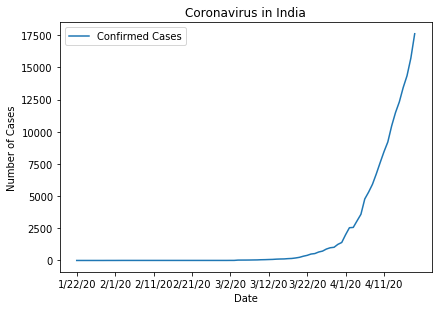

In [20]:
#Data visualization
plt.figure(1)
x_ticks = np.arange(0,90,10)
plt.xticks(x_ticks)
plt.plot(dates, india_list, label = "Confirmed Cases") 
plt.tight_layout()
plt.xlabel('Date') 
plt.ylabel('Number of Cases')
plt.title('Coronavirus in India') 
plt.legend() 
plt.show() 

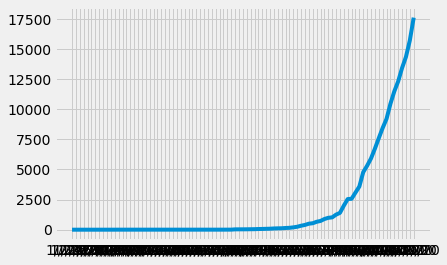

In [21]:
style.use('fivethirtyeight')

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

def update(i):
    graph_data = open('india.txt', 'r').read()
    lines = graph_data.split('\n')
    xs = []
    ys = []
    for line in lines:
        if len(line) > 1:
            x,y = line.split(',')
            xs.append(y)
            ys.append(int(x))
    ax.clear()
    ax.plot(xs,ys)

ani = animation.FuncAnimation(fig, update, interval =1000)
plt.show()